In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=6c7e60b58c55ce15d4a56338f5bd2bd6bcd2c157f32a2721fd1a9958205ec0a5
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.8 requires mkl, which is not installed.
tensorflow 2.13.1 requires nu

In [2]:
!pip install seaborn==0.11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 2.1 MB/s eta 0:00:0000:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.0
    Uninstalling seaborn-0.13.0:
      Successfully uninstalled seaborn-0.13.0


In [61]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import os
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Paths for the containers that we will create
# S3 Bucket where the data is stored
BUCKET_NAME = "tbilisimeetup"  # Put your S3 bucket name here
BUCKET = f's3://{BUCKET_NAME}'

# data paths
DATA_FOLDER = 'data'
DATA_FILE = 'data.csv'
DATA_PATH = os.path.join(BUCKET, DATA_FOLDER, DATA_FILE)


df = pd.read_csv(DATA_PATH)

In [63]:
print(df.shape)

(150001, 28)


In [64]:
##We see that we have 28 attributes and 15000 raws with data, 1 raw contains the columns name. 
##The data is taken from here https://www.kaggle.com/datasets/varun23/credit-score-prediction

In [65]:
(pd.DataFrame([df.isna().mean(), df.dtypes, df.nunique()])
   .T
   .rename({0:'fraction of na',
            1:'datatype',
            2:'n_unique_entries'}, axis=1))

,fraction of na,datatype,n_unique_entries
ID,0.0,object,150001
Customer_ID,0.0,object,12501
Month,0.0,object,13
Name,0.099999,object,10140
Age,0.0,object,2525
SSN,0.0,object,12502
Occupation,0.0,object,17
Annual_Income,0.0,object,21193
Monthly_Inhand_Salary,0.149999,object,21566
Num_Bank_Accounts,0.0,object,1427


In [66]:
#Removing all rows with missing values
df_cleaned=df.dropna()

In [67]:
(pd.DataFrame([df_cleaned.isna().mean(), df_cleaned.dtypes, df_cleaned.nunique()])
   .T
   .rename({0:'fraction of na',
            1:'datatype',
            2:'n_unique_entries'}, axis=1))

,fraction of na,datatype,n_unique_entries
ID,0.0,object,53049
Customer_ID,0.0,object,11071
Month,0.0,object,8
Name,0.0,object,9168
Age,0.0,object,1057
SSN,0.0,object,11064
Occupation,0.0,object,16
Annual_Income,0.0,object,14707
Monthly_Inhand_Salary,0.0,object,11629
Num_Bank_Accounts,0.0,object,585


In [68]:
print(df_cleaned.shape)

(53049, 28)


In [69]:
df_cleaned.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [71]:
#Let's check what kind of occupataions we have in the dataset
df_cleaned.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [72]:
df_cleaned.loc[df["Occupation"] == "_______", "Occupation"] = "Unknown"

In [81]:
#print(df_cleaned['Occupation'].value_counts()['_______'])
df_cleaned.Occupation.unique()

array(['Scientist', 'Unknown', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [77]:
df_cleaned.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [78]:
#print(df_cleaned['Payment_Behaviour'].value_counts()['!@9#%8'])
df_cleaned.loc[df["Payment_Behaviour"] == "!@9#%8", "Payment_Behaviour"] = "Unknown"

In [80]:
df_cleaned.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments', 'Unknown',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [39]:
df_cleaned.Customer_ID.unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [40]:
df_cleaned.Month.unique()

array(['January', 'July', 'February', 'March', 'May', 'June', 'August',
       'April'], dtype=object)

In [41]:
df_cleaned.Name.unique()

array(['Aaron Maashoh', 'Rick Rothackerj', 'Langep', ...,
       'Chris Wickhamm', 'Sarah McBridec', 'Nicks'], dtype=object)

In [82]:
df_cleaned.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = "Unknown"
df_cleaned.Credit_Mix.unique()

array(['Unknown', 'Good', 'Standard', 'Bad'], dtype=object)

In [83]:
df_cleaned.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [91]:
numerical_columns=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [92]:
#cleaning up the numbers, removing "_"
for column in numerical_columns:
    df_cleaned[column] = df_cleaned[column].astype(str).str.replace('_', '')

In [93]:
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [94]:
df_without_text_columns = df_cleaned[numerical_columns]
print(df_without_text_columns.head())

    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    23       19114.12            1824.843333                  3   
6    23       19114.12            1824.843333                  3   
8    28       34847.84            3037.986667                  2   
9    28       34847.84            3037.986667                  2   
10   28       34847.84            3037.986667                  2   

    Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0             809.98                 26.822620            49.574949   
6             809.98                 22.537593            49.574949   
8             605.03                 24.464031            18.816215   
9             605.03                 38.550848            18.816215   
10            605.03                 33.224951            18.816215   

    Amount_invested_monthly  Monthly_Balance  
0                 80.415295       312.494089  
6                178.344067       244.565317  
8                104.29

In [95]:
# Calculate the correlation matrix
correlation_matrix = df_without_text_columns.corr()

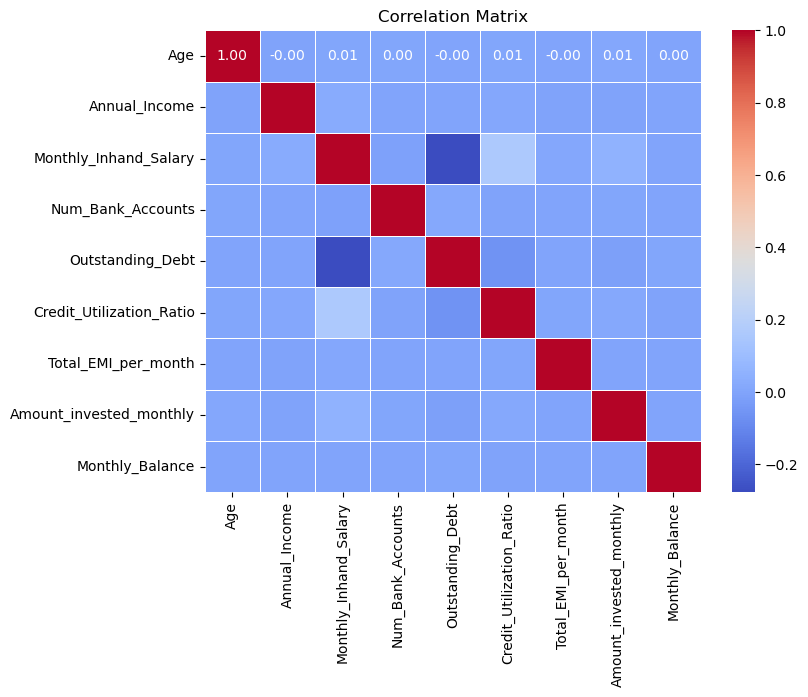

In [96]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()